# Importing the required modules

In [588]:
import numpy as np, pandas as pd

import matplotlib.pyplot as plt, seaborn as sns

import math as m

# Loading the dataset using pandas in the form of dataframe

In [589]:
df=pd.read_csv("Housing.csv")

# Taking a glimpse of the dataset and cleaning it

In [590]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [591]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [592]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [593]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [594]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [595]:
# Conclusion : No null value in the dataset.

# Encoding the data of the dataset

In [596]:
# Selecting the categorical attributes
#========================================
categorical_attributes= df.select_dtypes(include="object").columns
categorical_attributes

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [597]:
# Encoding the categorical attributes
#======================================
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded=df_encoded.astype(int)
df_encoded

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


# Tracing the target varaible for prediction

In [598]:
independent_varaibles=df_encoded.drop('price',axis=1)
target_varaibles=df['price']

independent_varaibles

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [599]:
target_varaibles

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

# Implementing linear regression using a machine learning library (Scikit-Learn)

In [600]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test,= train_test_split(independent_varaibles, target_varaibles, test_size=0.2, random_state=42)

In [601]:
# Implementing the regression
#=================================
from sklearn.linear_model import LinearRegression # This line imports the LinearRegression class from the sklearn.linear_model module.

# Creating an empty object of LinearRegression class
#=====================================================
model=LinearRegression()

# Training the model
#=======================
model.fit(X_train, Y_train)

# Extacting the coefficients and intercept as well as constructing the equation
#================================================================================
intercept=model.intercept_ # Value of the intercept
coefficient=model.coef_ # ndarray of coefficients
    # Together they will constitue the equation of the hyperplane

# Equation description
#========================
for i in zip(X_train.columns,coefficient):
    print(f"*) Feature {i[0]} has coefficient {round(i[1],2)}")
print()

print(f"The intercept is : {round(intercept,2)}")    

*) Feature area has coefficient 235.97
*) Feature bedrooms has coefficient 76778.7
*) Feature bathrooms has coefficient 1094444.79
*) Feature stories has coefficient 407476.59
*) Feature parking has coefficient 224841.91
*) Feature mainroad_yes has coefficient 367919.95
*) Feature guestroom_yes has coefficient 231610.04
*) Feature basement_yes has coefficient 390251.18
*) Feature hotwaterheating_yes has coefficient 684649.89
*) Feature airconditioning_yes has coefficient 791426.74
*) Feature prefarea_yes has coefficient 629890.57
*) Feature furnishingstatus_semi-furnished has coefficient -126881.82
*) Feature furnishingstatus_unfurnished has coefficient -413645.06

The intercept is : 260032.36


# Evaluating the model's performance on a separate test dataset using metrics such as Mean Squared Error or R-squared

In [602]:
from sklearn.metrics import mean_squared_error, r2_score

# Making prediction  on the test dataset
#===========================================
Y_predicted=model.predict(X_test)

# Residuals
#=============
residuals= Y_test-Y_predicted
residuals

316   -1.104654e+06
77    -5.747223e+05
360    6.001368e+05
90     1.827925e+06
493   -4.946463e+05
           ...     
15     4.126669e+06
357   -5.636509e+05
39     8.509373e+05
54     9.510591e+05
155   -8.338899e+05
Name: price, Length: 109, dtype: float64

In [603]:
# Calculating the errors: MSE
#=================================
mse=mean_squared_error(Y_test, Y_predicted)
rmse=m.sqrt(mse)
r2 = r2_score(Y_test, Y_predicted)

# Printing the results
#=========================
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 1754318687330.66
Root Mean Squared Error (RMSE): 1324506.96
R-squared (R²): 0.65


# Creating visualizations to illustrate the relationship between the predicted and actual values

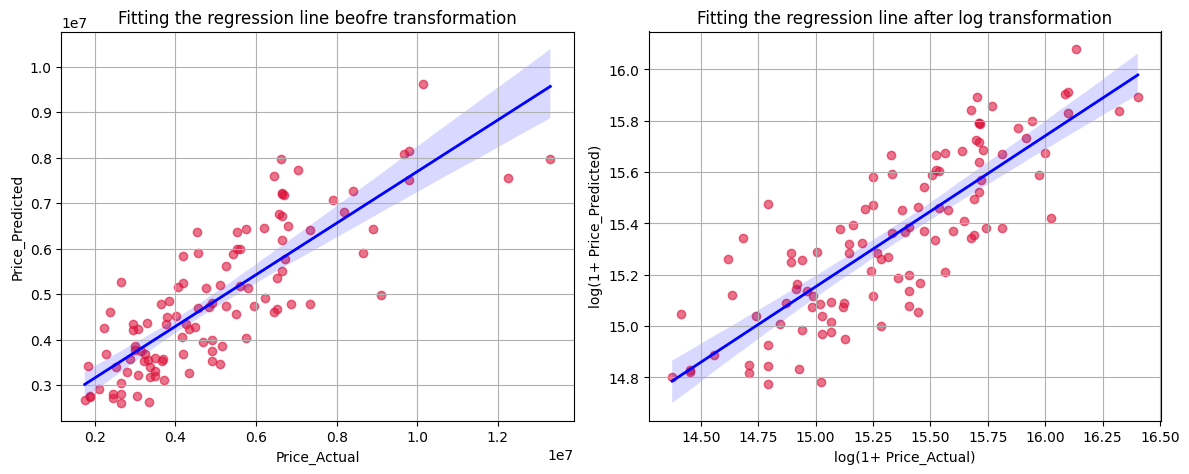

In [604]:
# Regression line for predicted price vs actual price
#=======================================================
fig, axes=plt.subplots(1,2,figsize=(12,5))
sns.regplot(x=Y_test,y=Y_predicted,color="red",scatter_kws={"color": "crimson", "alpha": 0.6}, line_kws={"color": "blue", "linewidth": 2},ax=axes[0])

axes[0].set_xlabel("Price_Actual")
axes[0].set_ylabel("Price_Predicted")
axes[0].set_title("Fitting the regression line beofre transformation")
axes[0].grid(True)

sns.regplot(x=np.log1p(Y_test),y=np.log1p(Y_predicted),color="red",scatter_kws={"color": "crimson", "alpha": 0.6}, line_kws={"color": "blue", "linewidth": 2},ax=axes[1])

axes[1].set_xlabel("log(1+ Price_Actual)")
axes[1].set_ylabel("log(1+ Price_Predicted)")
axes[1].set_title("Fitting the regression line after log transformation")
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Conclusions from the above plot
===============================================

1. Before Transformation (Left Plot)

✅ A positive linear trend is visible between actual and predicted values.

⚠️ However, the scatter increases at higher prices, indicating heteroscedasticity (non-constant error variance).

⚠️ Many high-priced houses are underpredicted, showing bias in the model.

⚠️ Prediction accuracy drops for extreme values, making the model less reliable on the original scale.

2. After Log(1 + Price) Transformation (Right Plot)

✅ The data becomes more linear, and the points align better with the regression line.

✅ The spread of residuals reduces significantly — the model errors become more uniform across the price range.

✅ The regression fit becomes tighter, improving R², reducing RMSE, and handling outliers more gracefully.

✅ The blue confidence band is narrower, showing the model is more confident about its predictions.

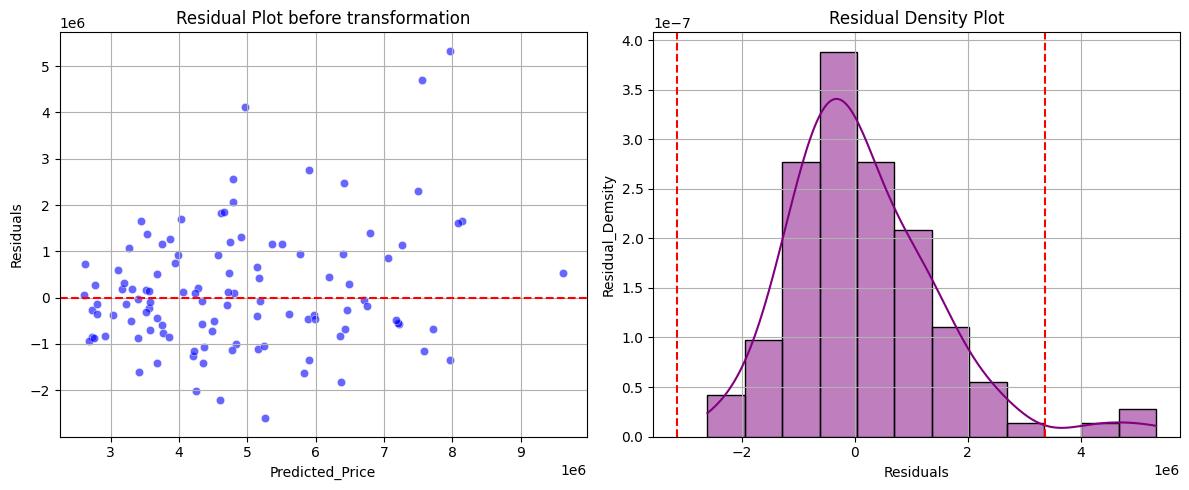

In [605]:
# Residual Plot analysis
#==========================
fig, axes= plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x=Y_predicted, y=residuals, color='blue', alpha=0.6, ax=axes[0])

axes[0].axhline(0, color='red', linestyle='--')
axes[0].set_xlabel("Predicted_Price")
axes[0].set_ylabel("Residuals")
axes[0].set_title("Residual Plot before transformation")
axes[0].grid(True)

# Outlier and distribution function building
#==============================================
#==============================================
from scipy.stats import skew
Q1= residuals.quantile(0.25)
Q3= residuals.quantile(0.75)

IQR=Q3-Q1

lower_bound= Q1-1.5*IQR
upper_bound= Q3+1.5*IQR

# Creating a boolean mask
#=========================
outliers_mask= (residuals< lower_bound) | (residuals> upper_bound) # As or is used to do between two values not two series obj element_wise.

# Obtaining the outliers
#========================
outliers= residuals[outliers_mask]

sns.histplot(residuals, stat='density', kde=True, color= 'purple')
axes[1].axvline(lower_bound , color='red', linestyle='--')
axes[1].axvline(upper_bound , color='red', linestyle='--')
axes[1].set_xlabel("Residuals")
axes[1].set_ylabel("Residual_Demsity")
axes[1].set_title("Residual Density Plot")
axes[1].grid(True)

plt.tight_layout()
plt.show()

# ✅ Conclusion from left plot :
=============================================

*) Linearity assumption is acceptable.

*) Slight heteroscedasticity is present, not severe.

*) A few potential outliers, but not enough to invalidate the model.

# ✅ Conclusion from right plot :
==============================================

*) Normality of residuals is fairly acceptable.

*) Minor skew, but not bad enough to demand log transform.

*) Model has decent predictive quality.

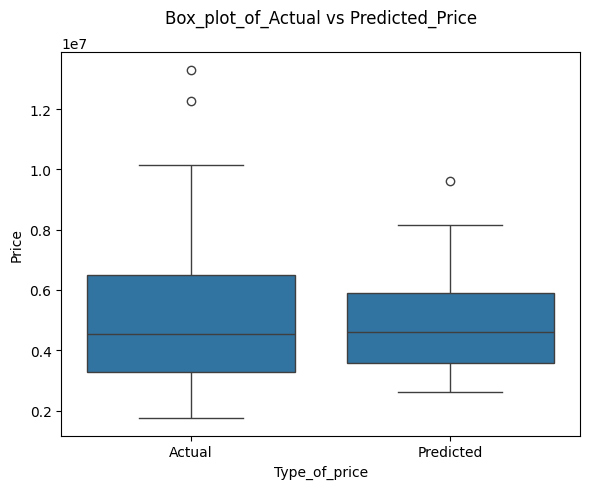

In [606]:
# Box plot of actual vs predicted prices
#==========================================
plt.figure(figsize=(6,5))
df_comparison= pd.DataFrame({"Actual": Y_test, "Predicted": Y_predicted})
df_melted= df_comparison.melt(var_name="Type_of_price", value_name="Price")

sns.boxplot(x='Type_of_price', y='Price', data= df_melted)
plt.title("Box_plot_of_Actual vs Predicted_Price\n")
plt.tight_layout()
plt.show()

# Conclusions

====================================================

# ✅ Median Alignment:

===================================================

*) The medians (center lines of boxes) of both actual and predicted prices are fairly close.

👉 This means the model is doing a decent job at capturing central tendency.

# ❗Predicted Prices Show Less Variability

===================================================

*) The interquartile range (IQR) of predicted prices is narrower than that of actual prices.

# ❗High-Price Properties Underpredicted

===================================================

*) There are more outliers (above whiskers) on the actual price side — predicted prices fail to reach these extremes.

👉 This suggests that high-value homes are being underpredicted, a limitation of linear models when price distribution is skewed.

# ✅ No Major Underprediction on the Lower End

====================================================

*) The lower whisker of predicted prices roughly aligns with actual prices.

👉 This shows the model is not significantly overpredicting cheaper houses.

In [607]:
# Comparing dual attributes simultaneously
#====================================================

In [608]:
df_encoded.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

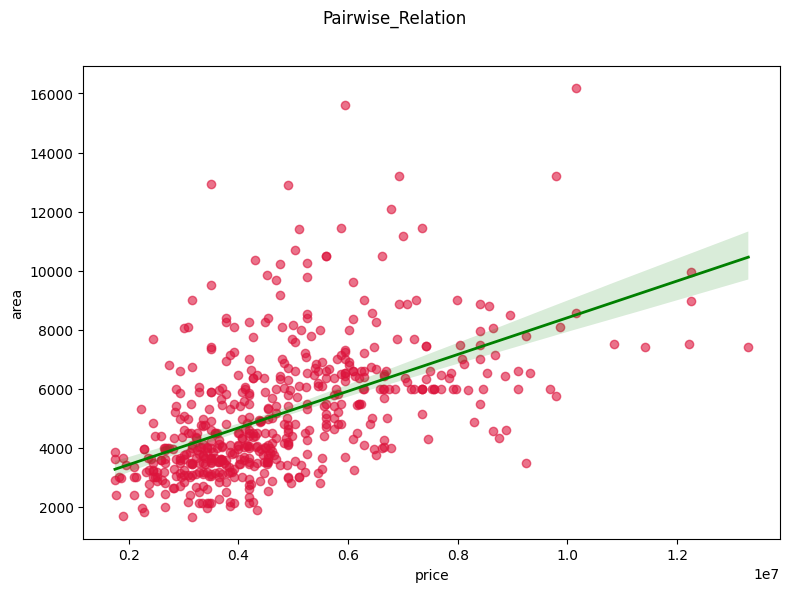

In [609]:
features=['price','area']
plt.figure(figsize=(8,6))
sns.regplot(x=df_encoded[features[0]], y=df_encoded[features[1]],scatter_kws={"color": "crimson", "alpha": 0.6}, line_kws={"color": "green", "linewidth": 2})
plt.suptitle("Pairwise_Relation\n")
plt.tight_layout()
plt.show()

# Conclusions

=====================

*) Trend: As the price increases, area also tends to increase.

*) Spread: There’s moderate dispersion — suggests other features may also influence price.

*) Linearity: Supports the assumption of linearity for linear regression.

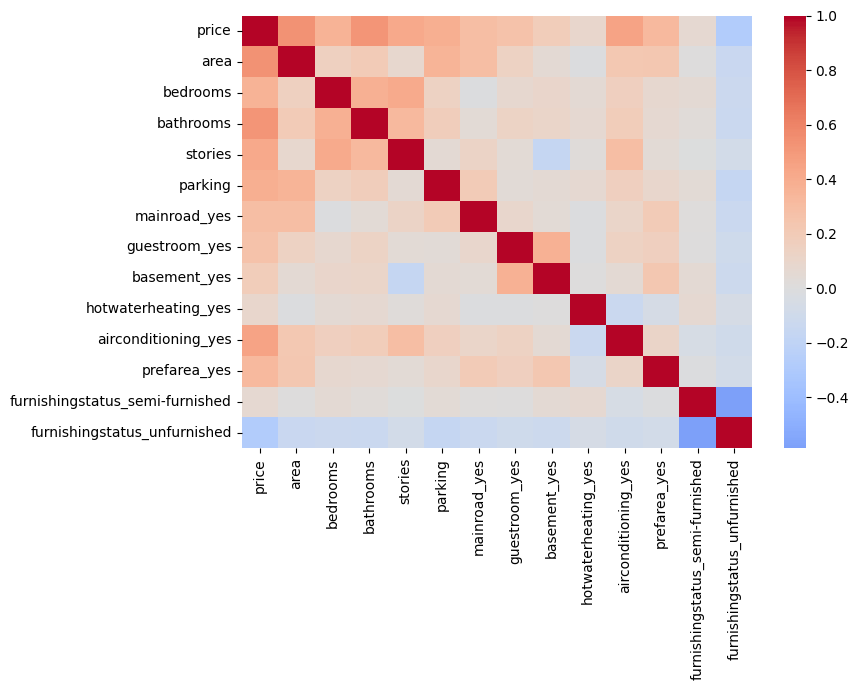

In [610]:
# Heatmap of Feature Correlations
#===================================
plt.figure(figsize=(9,7))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', annot=False, center=0)
plt.tight_layout()

# Conclusions

==========================================

# Strong Positive Correlation with price

*)  area shows the strongest positive correlation with price (near 1.0).

🔹 Conclusion: Larger houses tend to be more expensive.

*) bathrooms, bedrooms, and stories also show moderate positive correlations.

🔹 Conclusion: More features (rooms, floors) are associated with higher prices.

# Weak or No Correlation:

Features like parking, mainroad_yes, and guestroom_yes show weak to moderate correlation with price.

🔹 Conclusion: These may not be strong predictors individually, but could help in combination.

# Negative Correlation:

*)  furnishingstatus_unfurnished is negatively correlated with price.

🔹 Conclusion: Unfurnished houses tend to cost less.

*)  Conversely, furnishingstatus_semi-furnished shows a mild positive correlation.

🔹 Conclusion: Partial furnishing adds some value.
